In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python -m pip install utils

In [ ]:
import os
import glob
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from utils import *
%matplotlib inline

In [ ]:
import random

In [ ]:
# import modules
from datetime import datetime, timedelta

# Create starting and end datetime object from string
start = datetime.strptime("00:00:00", "%H:%M:%S")
end = datetime.strptime("23:55:55", "%H:%M:%S")

final = end.strftime("%H:%M:%S")

# min_gap
min_gap = 5

# compute datetime interval
time_list = [(start + timedelta(hours=min_gap*i/60)).strftime("%H:%M:%S")
       for i in range(int((end-start).total_seconds() / 60.0 / min_gap))]

time_list.append(final)
print(time_list)

['00:00:00', '00:05:00', '00:10:00', '00:15:00', '00:20:00', '00:25:00', '00:30:00', '00:35:00', '00:40:00', '00:45:00', '00:50:00', '00:55:00', '01:00:00', '01:05:00', '01:10:00', '01:15:00', '01:20:00', '01:25:00', '01:30:00', '01:35:00', '01:40:00', '01:45:00', '01:50:00', '01:55:00', '02:00:00', '02:05:00', '02:10:00', '02:15:00', '02:20:00', '02:25:00', '02:30:00', '02:35:00', '02:40:00', '02:45:00', '02:50:00', '02:55:00', '03:00:00', '03:05:00', '03:10:00', '03:15:00', '03:20:00', '03:25:00', '03:30:00', '03:35:00', '03:40:00', '03:45:00', '03:50:00', '03:55:00', '04:00:00', '04:05:00', '04:10:00', '04:15:00', '04:20:00', '04:25:00', '04:30:00', '04:35:00', '04:40:00', '04:45:00', '04:50:00', '04:55:00', '05:00:00', '05:05:00', '05:10:00', '05:15:00', '05:20:00', '05:25:00', '05:30:00', '05:35:00', '05:40:00', '05:45:00', '05:50:00', '05:55:00', '06:00:00', '06:05:00', '06:10:00', '06:15:00', '06:20:00', '06:25:00', '06:30:00', '06:35:00', '06:40:00', '06:45:00', '06:50:00', '06

In [ ]:
'''read csv data at load_path and return it in a numpy matrix'''
def get_load_data(load_path):
    data = pd.read_csv(load_path)
    # get date in the format- '01-10-2017'
    date_ = load_path.split('/')[-1][:-4]
    data['date'] = datetime.strptime(date_, "%d-%m-%Y").date()
    data['time'] += ':00'
    data['datetime'] = pd.to_timedelta(data['time'])
    data['hour'] = data['datetime'].dt.seconds // 3600
    data['day'] = pd.Series([data.iloc[i]['date'].weekday() for i in range(data.shape[0])])
    print(data.shape[0])

    print(data)

    new_list = [[x,i] for i,x in enumerate(time_list) if x not in data['time'].tolist()]
    print(new_list)
    return data.to_numpy()

In [ ]:
data_list = glob.glob('/content/drive/MyDrive/SLDC_Data/*/*/*.csv')

data = get_load_data(data_list[0])

287
         time    value        date        datetime  hour  day
0    00:00:00  2360.59  2022-11-01 0 days 00:00:00     0    1
1    00:05:00  2330.36  2022-11-01 0 days 00:05:00     0    1
2    00:10:00  2336.37  2022-11-01 0 days 00:10:00     0    1
3    00:15:00  2281.00  2022-11-01 0 days 00:15:00     0    1
4    00:20:00  2273.89  2022-11-01 0 days 00:20:00     0    1
..        ...      ...         ...             ...   ...  ...
282  23:30:00  2481.60  2022-11-01 0 days 23:30:00    23    1
283  23:35:00  2465.39  2022-11-01 0 days 23:35:00    23    1
284  23:40:00  2427.47  2022-11-01 0 days 23:40:00    23    1
285  23:45:00  2436.42  2022-11-01 0 days 23:45:00    23    1
286  23:50:00  2429.03  2022-11-01 0 days 23:50:00    23    1

[287 rows x 6 columns]
[['23:55:55', 287]]


In [ ]:
'''read csv data at load_path and return it in a numpy matrix'''
def get_day_load_data(load_path):
    data = pd.read_csv(load_path)
    # get date in the format- '01-10-2017'
    # print(data)
    date_ = load_path.split('/')[-1][:-4]
    # print(date_)
    data['date'] = datetime.strptime(date_, "%d-%m-%Y").date()
    data['time'] += ':00'
    data['datetime'] = pd.to_timedelta(data['time'])
    data['hour'] = data['datetime'].dt.seconds // 3600
    # print(len(data))
    return data.to_numpy()

In [ ]:
'''Returns time, day, temp, humidity and load values for each 30mins in a numpy matrix'''
def get_30min_wise_data(day_load_data):
    data = []
    # SLDC load data has time step of 5 mins. Hence, total of 24 * (60 // 5)
    zero_load = day_load_data[0][1]
    def_date = day_load_data[0][2].weekday()
    print(day_load_data[0])
    for i in range(0, 288,6):
        try :
            load = day_load_data[i][1]
        except Exception as e:
            load=zero_load

        try:
          day = day_load_data[i][2].weekday()
        except Exception as e:
          day= def_date

        try:
            humidity = 55
         # some dirt values in data
        except Exception as e:
            humidity = random.randint(40, 60)
        try:
            temp = random.randint(26, 35) # i//6 because whether data is already in 30 min step size
        except Exception as err:
            temp =  random.randint(26, 35)
        data.append([i, day, temp, humidity, load])

    # print(data)
    return np.asarray(data)

In [ ]:
'''Return data of all csv files in SLDC_Data/ folder in matrix form'''
def get_data(data_list, shuffle=True):
    data = []
    for load_path in data_list:
        try:
            # whether_path = load_path.replace('SLDC_Data', 'Whether_Data')
            print(load_path)
            day_load_data = get_day_load_data(load_path)
            # day_whether_data = pd.read_csv(whether_path)
            day_data = get_30min_wise_data(day_load_data)
            # print(len(day_data))
            data.append(day_data)
        except Exception as e:
            print(load_path, e)
    # (115, 48, 5)
    data = np.asarray(data)
    # (5520, 5)
    data = data.reshape(-1, 5)
    if shuffle: np.random.shuffle(data)
    return data

In [ ]:
# Doing data preprocessing
data_list = glob.glob('/content/drive/MyDrive/SLDC_Data/*/*/*.csv')
train, test = data_list[:100], data_list[120:]


In [ ]:
test_data = get_data(test)

In [ ]:
testdataset = pd.DataFrame({'Day': test_data[:, 1], 'Temp': test_data[:, 2], 'Humidity': test_data[:, 3], 'Load': test_data[:, 4]})

In [ ]:
testdataset

,Day,Temp,Humidity,Load
0,6.0,27.0,55.0,4010.60
1,5.0,33.0,55.0,4444.16
2,0.0,29.0,55.0,1821.41
3,2.0,29.0,55.0,5072.23
4,3.0,31.0,55.0,1667.40
...,...,...,...,...
1435,6.0,34.0,55.0,1951.76
1436,4.0,34.0,55.0,3382.55
1437,5.0,27.0,55.0,3750.22
1438,2.0,32.0,55.0,2534.68


In [ ]:
train_data = get_data(train)
# features
X_train = train_data[:, 1:]
 # load, reshaped to 2D
Y_train = train_data[:, -1].reshape(-1, 1)

In [ ]:
dataset = pd.DataFrame({'Day': train_data[:, 1], 'Temp': train_data[:, 2], 'Humidity': train_data[:, 3], 'Load': train_data[:, 4]})


In [ ]:
dataset

,Day,Temp,Humidity,Load
0,5.0,35.0,55.0,3372.88
1,4.0,30.0,55.0,2439.68
2,3.0,32.0,55.0,3291.19
3,3.0,33.0,55.0,1798.73
4,5.0,30.0,55.0,2434.50
...,...,...,...,...
4795,6.0,33.0,55.0,2925.24
4796,3.0,32.0,55.0,3772.06
4797,5.0,35.0,55.0,1674.61
4798,1.0,35.0,55.0,3695.87


In [ ]:
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

In [ ]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
  X, y = list(), list()
  for i in range(len(sequences)):
  # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the dataset
    if end_ix > len(sequences):
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequences[i:end_ix,:], sequences[end_ix-1, -1]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

n_steps = 3
# convert into input/output
X, y = split_sequences(dataset.to_numpy(), n_steps)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
 print(X[i], y[i])

In [ ]:
# the dataset knows the number of features, e.g. 4
n_features = X.shape[2]
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=2)


Epoch 1/1000
150/150 - 1s - loss: 1536741.1250 - 960ms/epoch - 6ms/step
Epoch 2/1000
150/150 - 0s - loss: 300608.4688 - 318ms/epoch - 2ms/step
Epoch 3/1000
150/150 - 0s - loss: 237521.2812 - 347ms/epoch - 2ms/step
Epoch 4/1000
150/150 - 0s - loss: 228726.5000 - 325ms/epoch - 2ms/step
Epoch 5/1000
150/150 - 0s - loss: 223814.0781 - 310ms/epoch - 2ms/step
Epoch 6/1000
150/150 - 0s - loss: 220051.4688 - 289ms/epoch - 2ms/step
Epoch 7/1000
150/150 - 0s - loss: 217097.6406 - 264ms/epoch - 2ms/step
Epoch 8/1000
150/150 - 0s - loss: 213028.5156 - 265ms/epoch - 2ms/step
Epoch 9/1000
150/150 - 0s - loss: 209656.8438 - 344ms/epoch - 2ms/step
Epoch 10/1000
150/150 - 0s - loss: 207144.1094 - 377ms/epoch - 3ms/step
Epoch 11/1000
150/150 - 0s - loss: 202994.0312 - 468ms/epoch - 3ms/step
Epoch 12/1000
150/150 - 0s - loss: 202795.7188 - 428ms/epoch - 3ms/step
Epoch 13/1000
150/150 - 0s - loss: 196831.3906 - 453ms/epoch - 3ms/step
Epoch 14/1000
150/150 - 0s - loss: 193078.7812 - 447ms/epoch - 3ms/step


In [ ]:
test = data_list[120:]

In [ ]:
test_data = get_data(test, shuffle=False)

In [ ]:
testdataset = pd.DataFrame({'Day': test_data[:, 1], 'Temp': test_data[:, 2], 'Humidity': test_data[:, 3], 'Load': test_data[:, 4]})

In [ ]:
testdataset

,Day,Temp,Humidity,Load
0,0.0,32.0,55.0,2207.84
1,0.0,30.0,55.0,2021.45
2,0.0,34.0,55.0,1911.13
3,0.0,33.0,55.0,1821.41
4,0.0,33.0,55.0,1777.04
...,...,...,...,...
1435,1.0,34.0,55.0,2163.89
1436,1.0,35.0,55.0,2163.89
1437,1.0,30.0,55.0,2163.89
1438,1.0,29.0,55.0,2163.89


In [ ]:
X, y = split_sequences(testdataset.to_numpy(), n_steps)
print(X.shape, y.shape)

(1438, 3, 4) (1438,)


[[1943.5674]
 [1829.2794]
 [1783.3119]
 ...
 [2192.5938]
 [2190.6863]
 [2191.3816]]


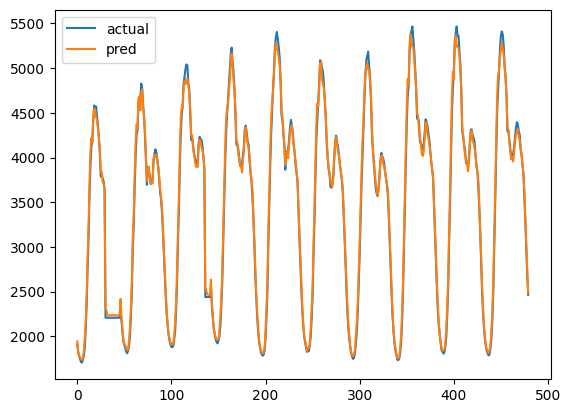

In [ ]:
yhat = model.predict(X, verbose=0)
print(yhat)

plt.plot(range(480), y[:480])
plt.plot(range(480), yhat[:480])
plt.legend(['actual', 'pred'])
plt.show()

In [ ]:
'''selects a date in data and plots the predicted curve using the trained model'''
def predict(data):
    try:
        # to select a date in data data
        x = np.random.randint(len(data))
        data_data = get_data([data[x]], shuffle=False)
        X_data = data_data[:, :-1] # features
        Y_data = data_data[:, -1].reshape(-1, 1) # load, reshaped to 2D

        n_steps = 3
        # convert into input/output
        X, y = split_sequences(dataset.to_numpy(), n_steps)
        print(X.shape, y.shape)

        preds = model.predict(X)

        plt.plot(range(50,150), y)
        plt.plot(range(50,150), preds)
        plt.legend(['actual', 'pred'])
        plt.title(data[x])
        plt.show()
    except Exception as e:
        print('Err in data', e)

In [ ]:
predict(train)

In [ ]:
train_data

array([[2.64000e+02, 6.00000e+00, 2.80000e+01, 5.50000e+01, 2.39808e+03],
       [2.40000e+01, 2.00000e+00, 2.80000e+01, 5.50000e+01, 1.68819e+03],
       [2.34000e+02, 5.00000e+00, 2.80000e+01, 5.50000e+01, 3.07675e+03],
       ...,
       [1.62000e+02, 5.00000e+00, 2.80000e+01, 5.50000e+01, 4.44334e+03],
       [1.20000e+02, 2.00000e+00, 2.80000e+01, 5.50000e+01, 3.50317e+03],
       [1.44000e+02, 5.00000e+00, 2.80000e+01, 5.50000e+01, 4.66957e+03]])